In [482]:
pip install librosa numpy pandas scikit-learn tensorflowpip install librosa numpy pandas scikit-learn tensorflow matplotlib IPython

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflowpip (from versions: none)
ERROR: No matching distribution found for tensorflowpip

[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [483]:
import matplotlib.pyplot as plt
from IPython.display import Audio, display
import seaborn as sns

In [484]:
base_dir = 'C:/Users/Snega/Downloads/-6_dB_fan/fan/id_00'

In [485]:
# Define subdirectories for normal and abnormal sounds
normal_dir = os.path.join(base_dir, 'normal')
abnormal_dir = os.path.join(base_dir, 'abnormal')

In [486]:
# Initialize lists to store data
data = []
sample_rates = []
labels = []
duration=[]


In [487]:
# Function to check if an audio segment is silent
def is_silent(audio, threshold=0.01):
    return np.max(np.abs(audio)) < threshold

In [488]:
# Function to preprocess audio
def preprocess_audio(file_path):
    audio, sr = librosa.load(file_path, sr=None)
    audio = librosa.effects.trim(audio)[0]  
    audio = librosa.util.normalize(audio)  
    return audio, sr

In [489]:
normal_count = 0
for file_name in os.listdir(normal_dir):
    if file_name.endswith('.wav'):
        file_path = os.path.join(normal_dir, file_name)
        audio, sr = librosa.load(file_path, sr=None)
        data.append(audio)
        sample_rates.append(sr)
        labels.append('normal')
        durations.append(librosa.get_duration(y=audio, sr=sr))
        normal_count += 1
       
        
       


Playing normal audio 1


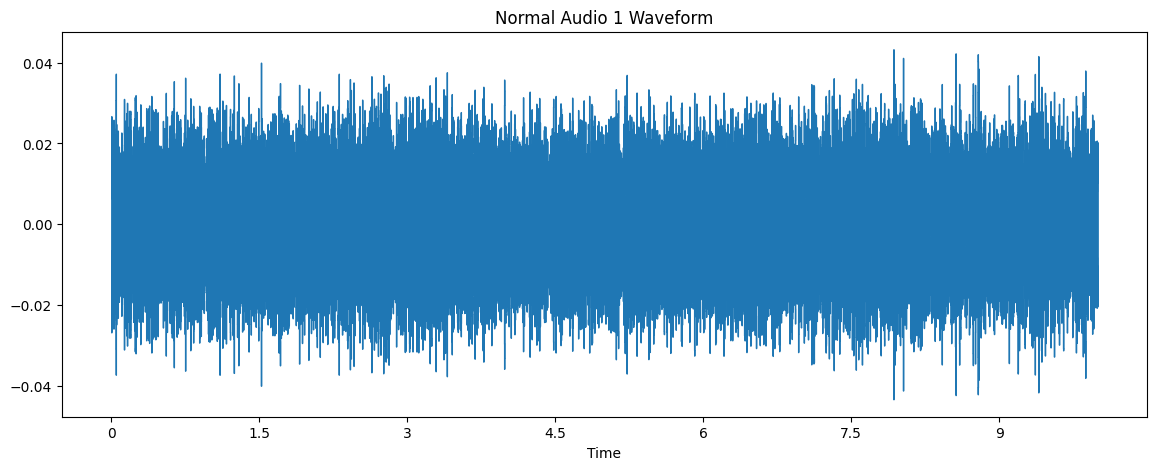

Playing normal audio 2


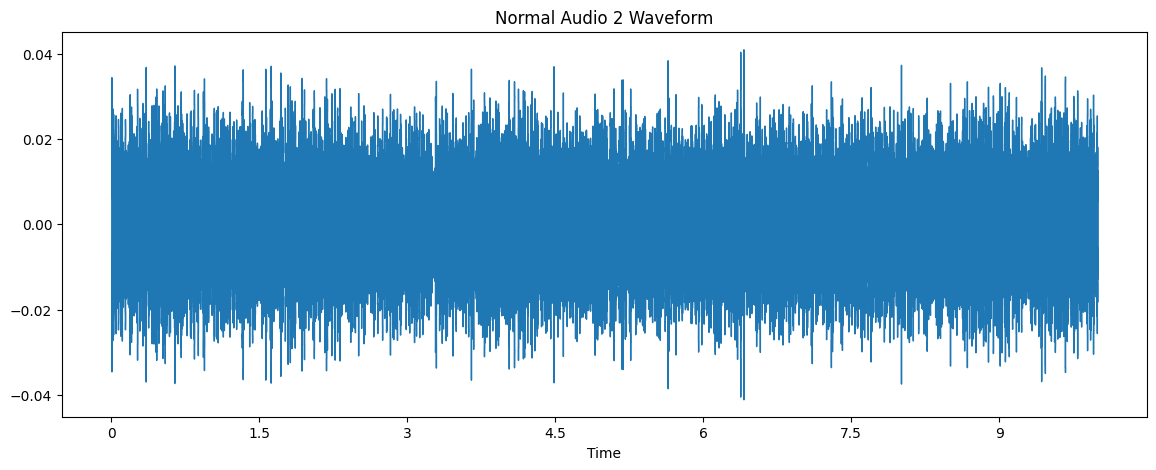

Playing normal audio 3


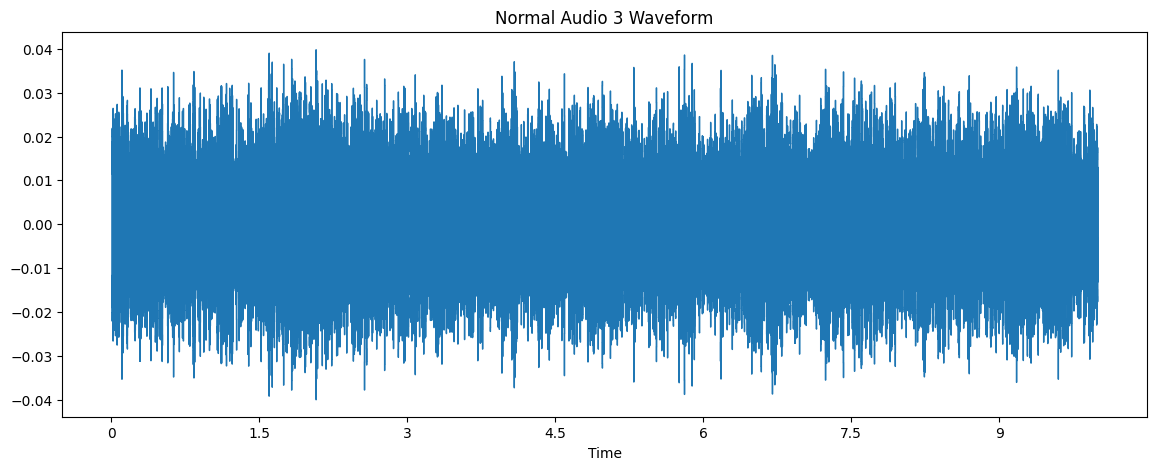

In [490]:
import random

def print_three_random_normal_sounds():
    
    
    
    random_indices = random.sample(range(len(data)), 3)
    
    for idx, i in enumerate(random_indices):
        audio = data[i]
        sr = sample_rates[i]
        
        # Play the audio
        print(f"Playing normal audio {idx + 1}")
        display(Audio(audio, rate=sr))
        
        # Plot the audio waveform
        plt.figure(figsize=(14, 5))
        plt.title(f'Normal Audio {idx + 1} Waveform')
        librosa.display.waveshow(audio, sr=sr)
        plt.show()

# Example usage:
print_three_random_normal_sounds()


In [491]:

# Load abnormal sounds
abnormal_count = 0
for file_name in os.listdir(abnormal_dir):
    if file_name.endswith('.wav'):
        file_path = os.path.join(abnormal_dir, file_name)
        audio, sr = librosa.load(file_path, sr=None)
        data.append(audio)
        sample_rates.append(sr)
        labels.append('abnormal')
        durations.append(librosa.get_duration(y=audio, sr=sr))
        abnormal_count += 1
        

  

Playing abnormal audio 1


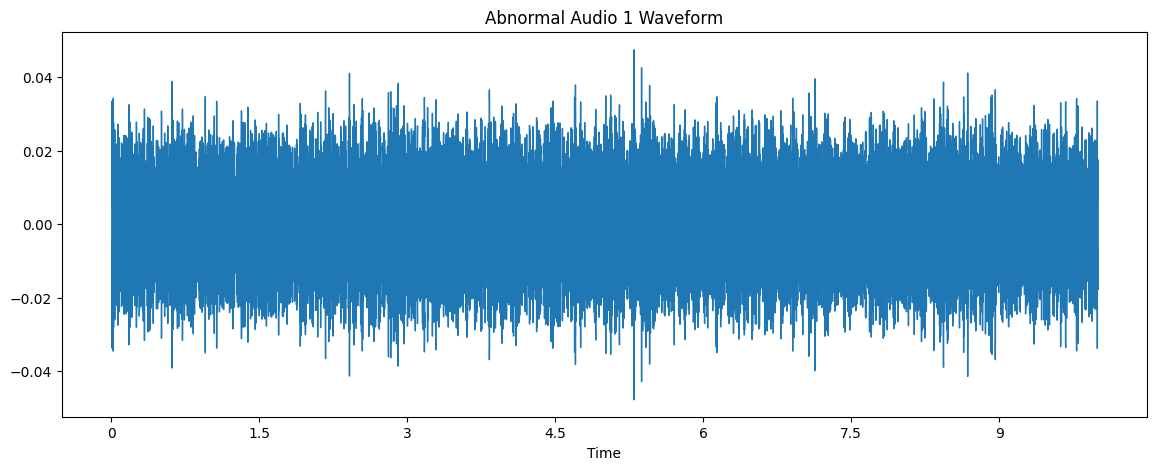

Playing abnormal audio 2


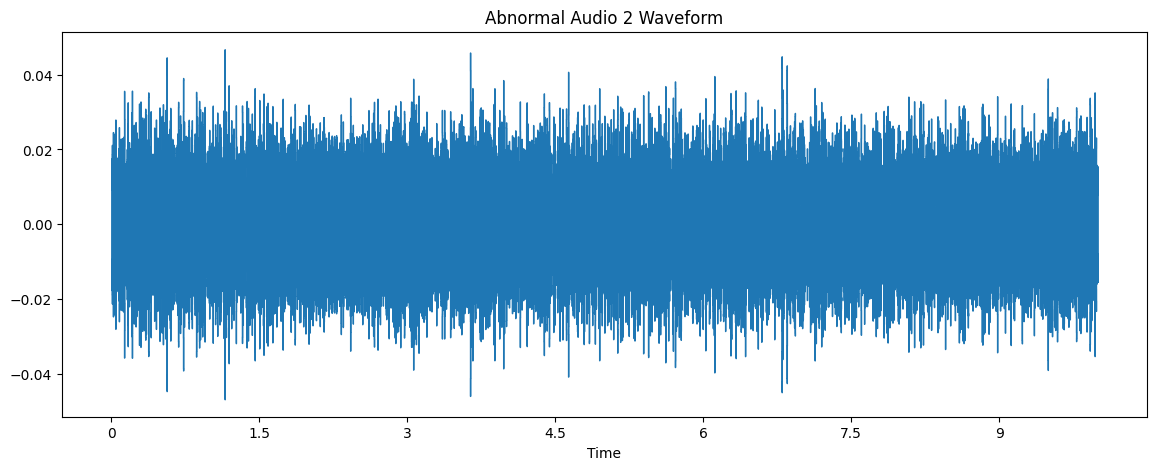

Playing abnormal audio 3


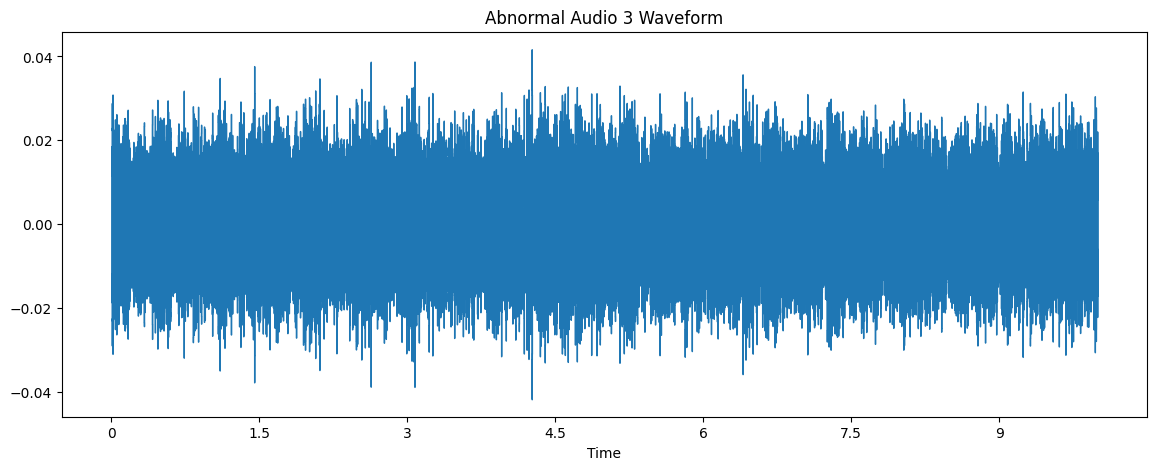

In [492]:
import random




def print_three_random_abnormal_sounds():
   
    if len(data) < 3:
        print("Not enough abnormal sounds loaded.")
        return
    
    
    random_indices = random.sample(range(len(data)), 3)
    
    for idx, i in enumerate(random_indices):
        audio = data[i]
        sr = sample_rates[i]
        
        
        print(f"Playing abnormal audio {idx + 1}")
        display(Audio(audio, rate=sr))
        
        
        plt.figure(figsize=(14, 5))
        plt.title(f'Abnormal Audio {idx + 1} Waveform')
        librosa.display.waveshow(audio, sr=sr)
        plt.show()


print_three_random_abnormal_sounds()


In [466]:
display(Audio(audio, rate=sr))

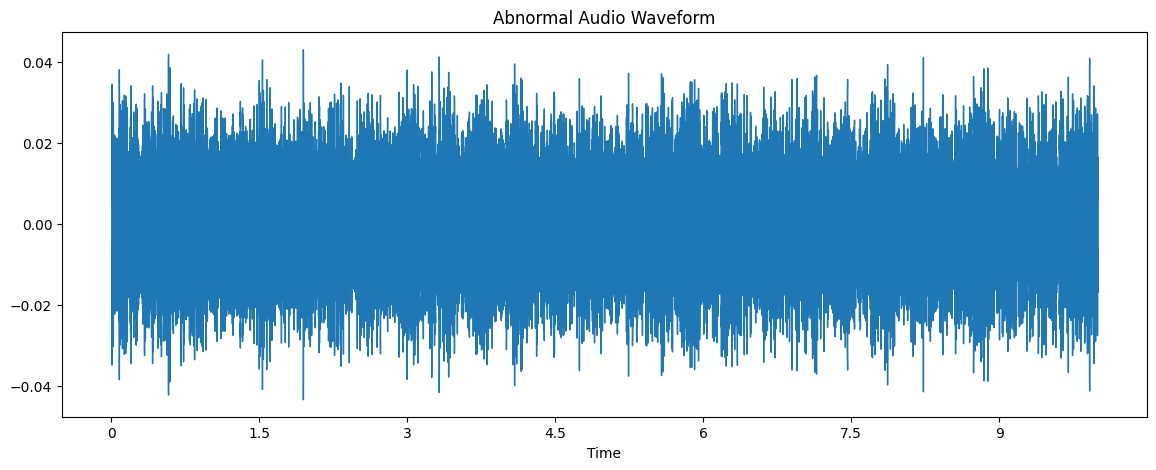

In [467]:
plt.figure(figsize=(14, 5))
plt.title('Abnormal Audio Waveform')
librosa.display.waveshow(audio, sr=sr)
plt.show()

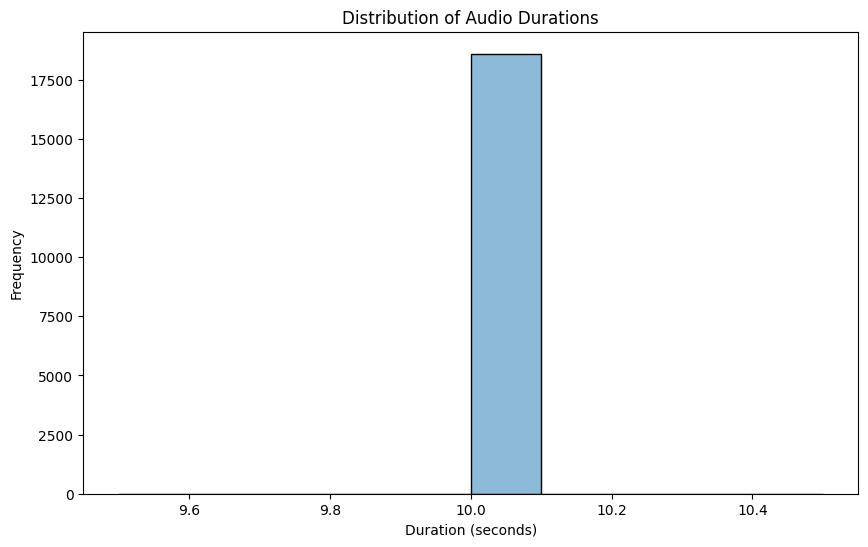

In [468]:
#distribution of audio durations
plt.figure(figsize=(10, 6))
sns.histplot(durations, kde=True, bins=10)
plt.title('Distribution of Audio Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()


In [469]:

data = np.array(data)
sample_rates = np.array(sample_rates)
labels = np.array(labels)

print(f'Loaded {len(data)} files with sample rates: {np.unique(sample_rates)}')

Loaded 1418 files with sample rates: [16000]


In [470]:
def extract_features(audio, sr, n_mfcc=13):
   
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)
    
    mfccs_mean = np.mean(mfccs, axis=1)
    return mfccs_mean


features = []


for audio, sr in zip(data, sample_rates):
    mfccs_mean = extract_features(audio, sr)
    features.append(mfccs_mean)


features = np.array(features)

print(f'Extracted features from {features.shape[0]} files.')


Extracted features from 1418 files.


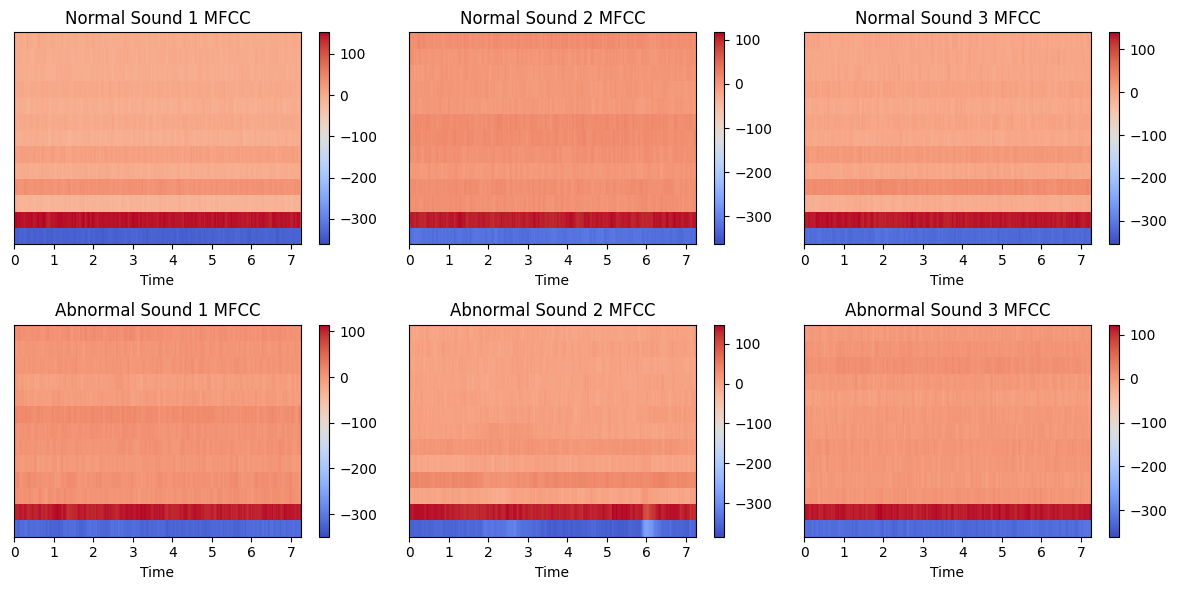

In [471]:
#MFCC features for normal and abnormal sounds
plt.figure(figsize=(12, 6))

for i in range(3):
    plt.subplot(2, 3, i+1)
    plt.title(f'Normal Sound {i+1} MFCC')
    librosa.display.specshow(librosa.feature.mfcc(y=data[i], sr=sample_rates[i], n_mfcc=13), x_axis='time')
    plt.colorbar()

for i in range(3):
    plt.subplot(2, 3, i+4)
    plt.title(f'Abnormal Sound {i+1} MFCC')
    librosa.display.specshow(librosa.feature.mfcc(y=data[i+3], sr=sample_rates[i+3], n_mfcc=13), x_axis='time')
    plt.colorbar()

plt.tight_layout()
plt.show()

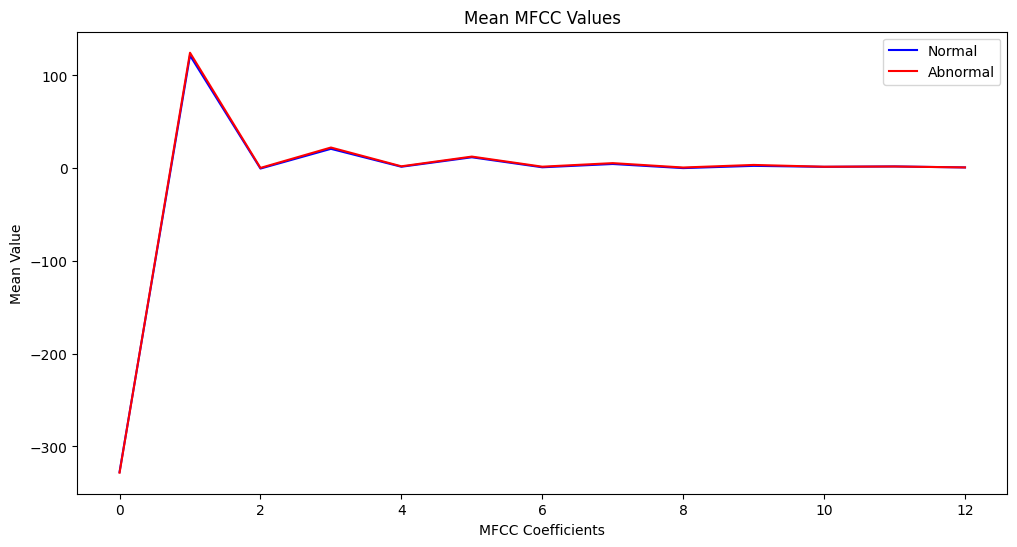

In [472]:
# mean MFCC values for normal and abnormal sounds
normal_mfcc_means = np.mean([features[i] for i in range(len(labels)) if labels[i] == 'normal'], axis=0)
abnormal_mfcc_means = np.mean([features[i] for i in range(len(labels)) if labels[i] == 'abnormal'], axis=0)

#mean MFCC values
plt.figure(figsize=(12, 6))
plt.plot(normal_mfcc_means, label='Normal', color='blue')
plt.plot(abnormal_mfcc_means, label='Abnormal', color='red')
plt.title('Mean MFCC Values')
plt.xlabel('MFCC Coefficients')
plt.ylabel('Mean Value')
plt.legend()
plt.show()

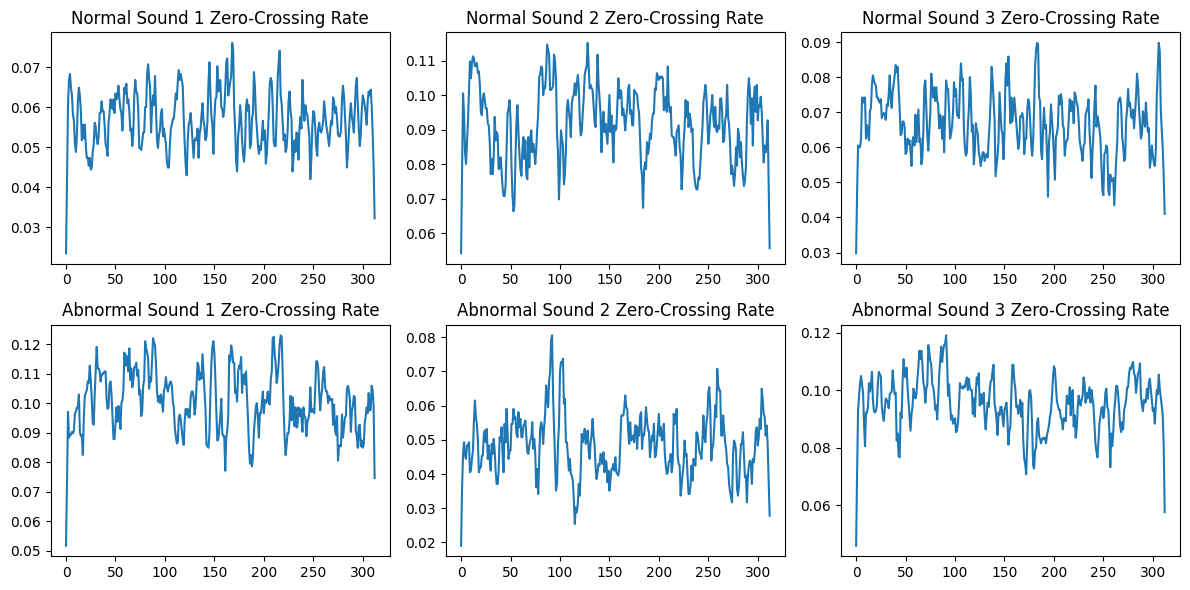

In [473]:

def zero_crossing_rate(audio):
    return librosa.feature.zero_crossing_rate(audio)[0]

#zero-crossing rate for normal and abnormal sounds
plt.figure(figsize=(12, 6))
for i in range(3):
    plt.subplot(2, 3, i+1)
    zcr = zero_crossing_rate(data[i])
    plt.plot(zcr)
    plt.title(f'Normal Sound {i+1} Zero-Crossing Rate')

for i in range(3):
    plt.subplot(2, 3, i+4)
    zcr = zero_crossing_rate(data[i+3])
    plt.plot(zcr)
    plt.title(f'Abnormal Sound {i+1} Zero-Crossing Rate')

plt.tight_layout()
plt.show()


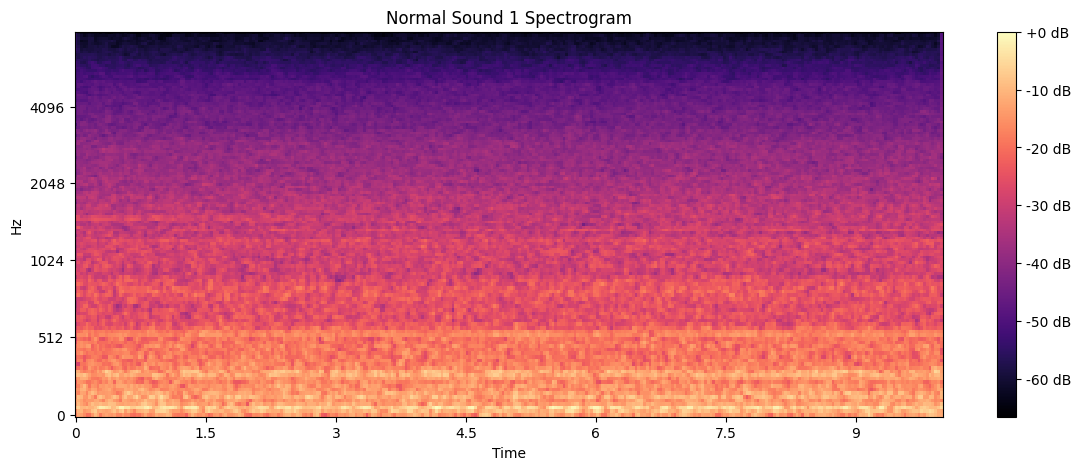

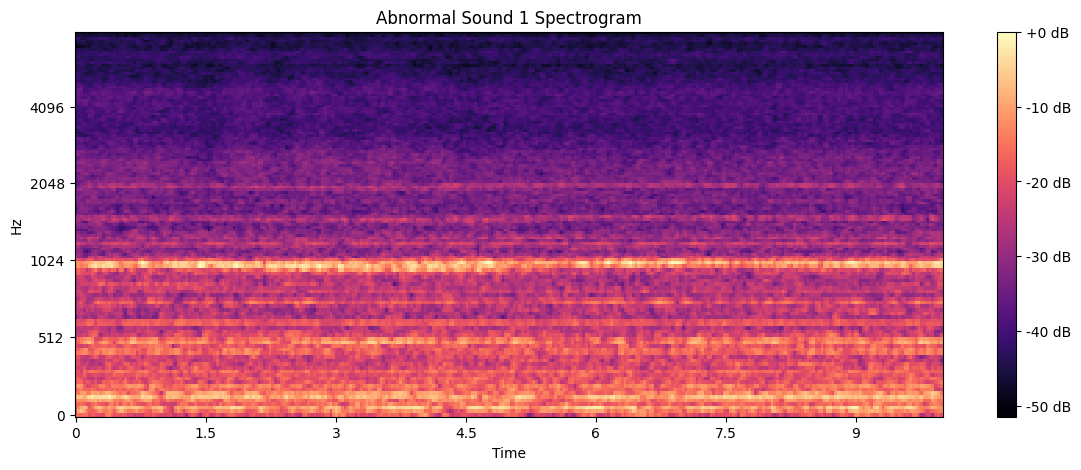

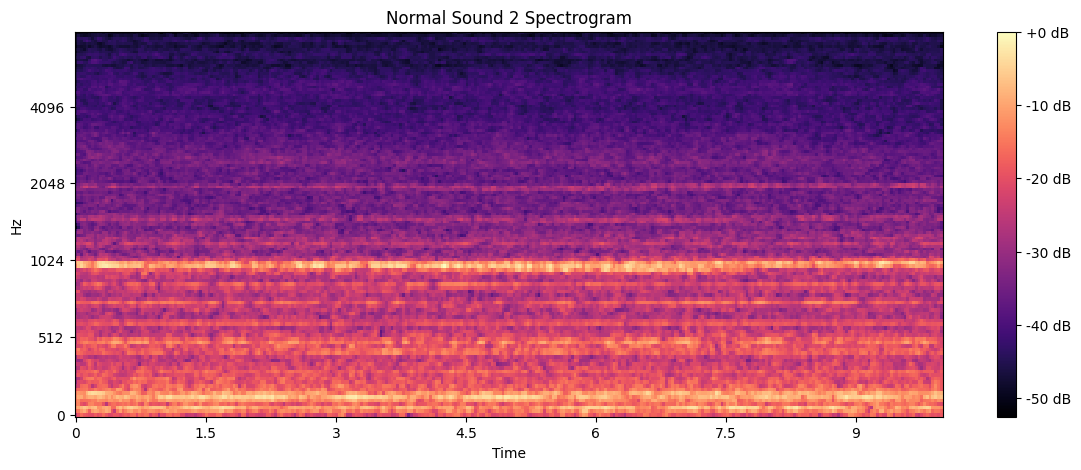

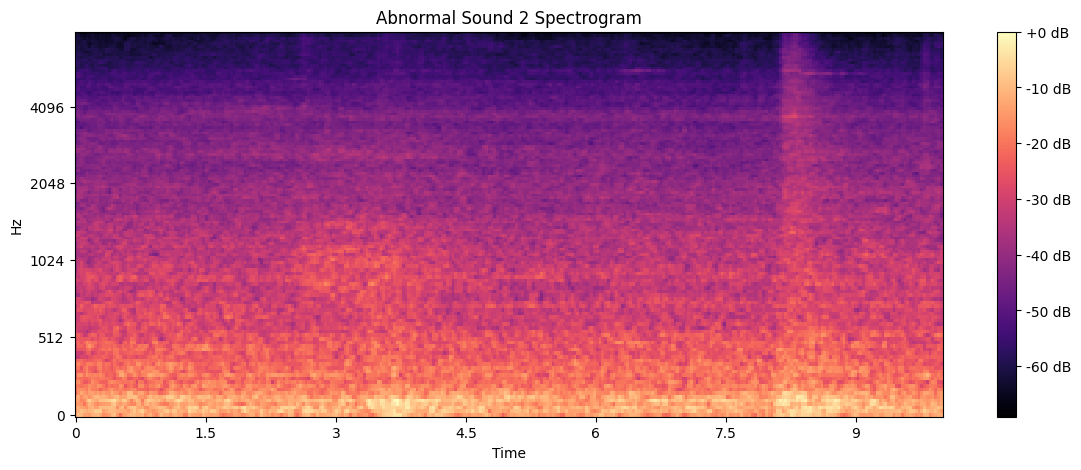

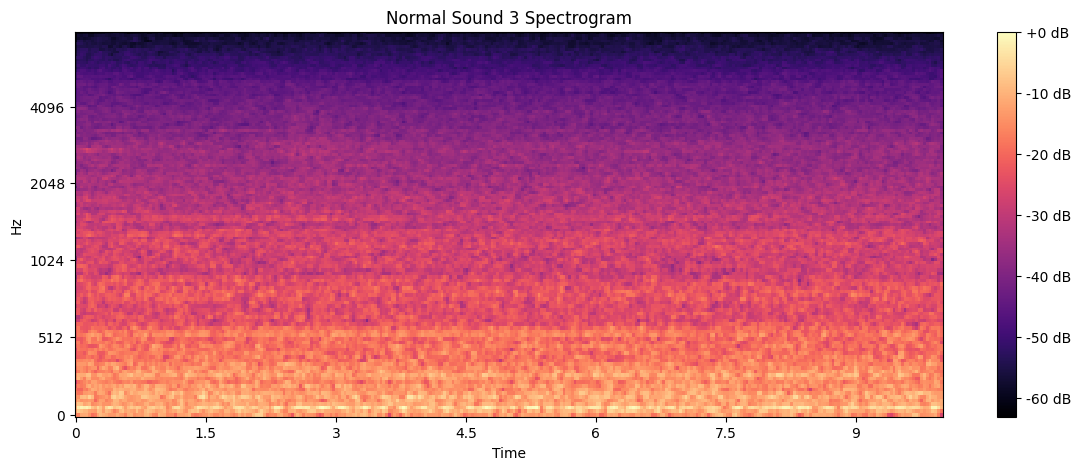

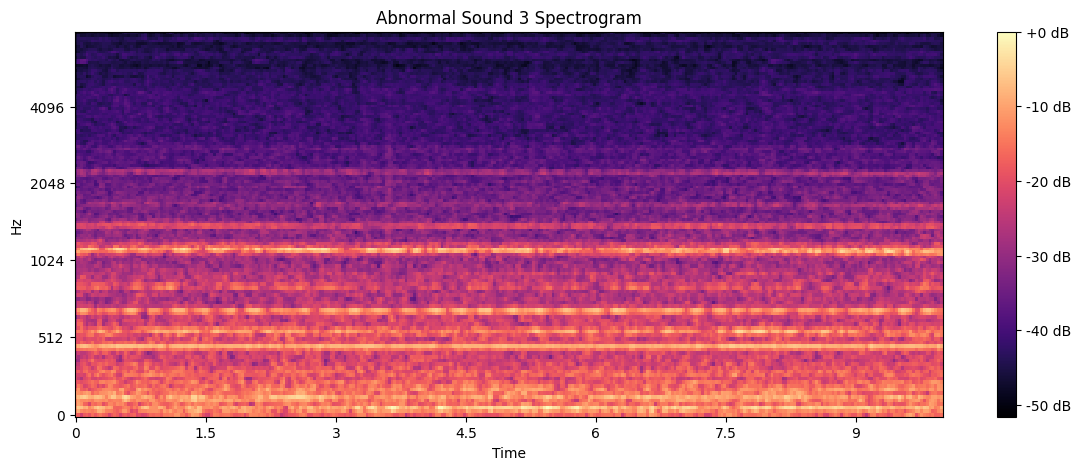

In [474]:
def plot_spectrogram(audio, sr, title='Spectrogram'):
    plt.figure(figsize=(14, 5))
    S = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=128)
    S_dB = librosa.power_to_db(S, ref=np.max)
    librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.show()

# spectrograms for normal and abnormal sounds
for i in range(3):
    plot_spectrogram(data[i], sample_rates[i], title=f'Normal Sound {i+1} Spectrogram')
    plot_spectrogram(data[i+3], sample_rates[i+3], title=f'Abnormal Sound {i+1} Spectrogram')

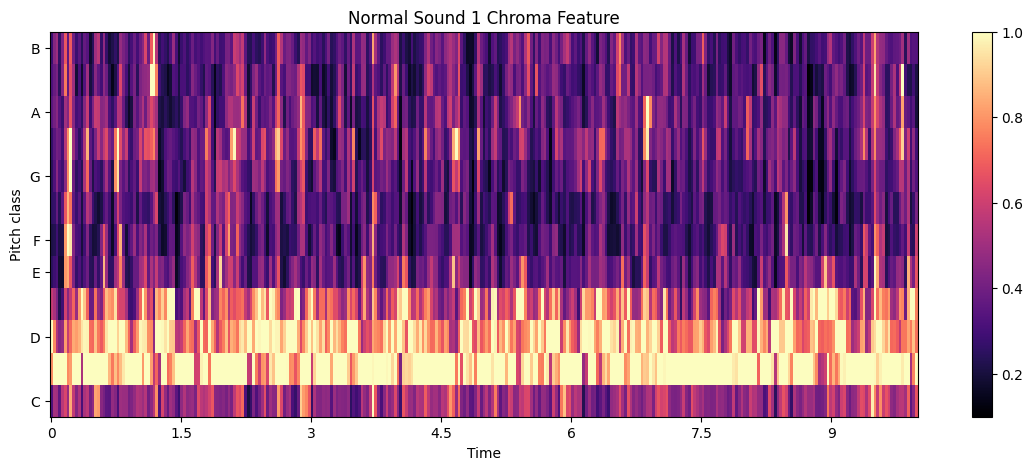

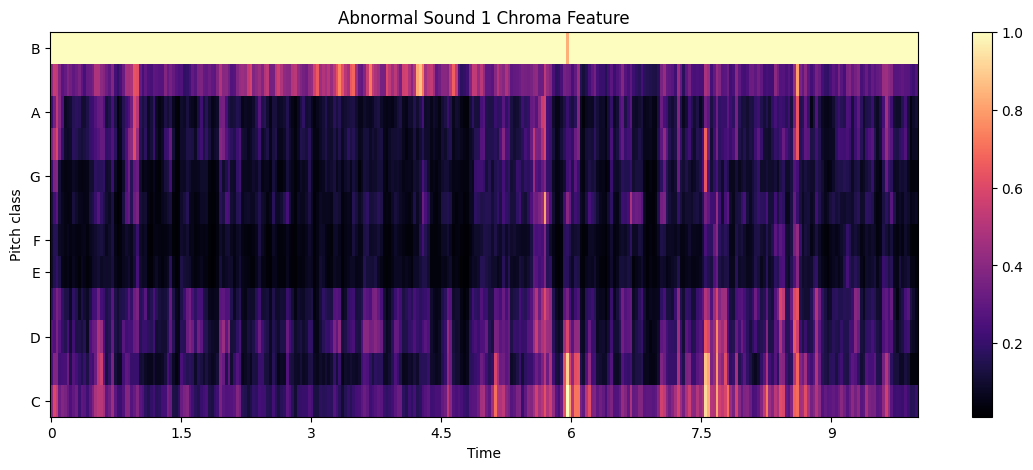

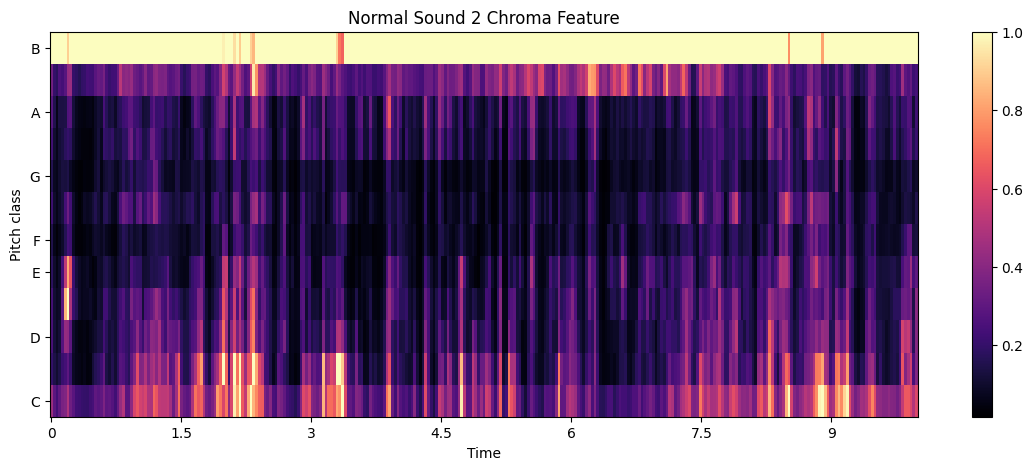

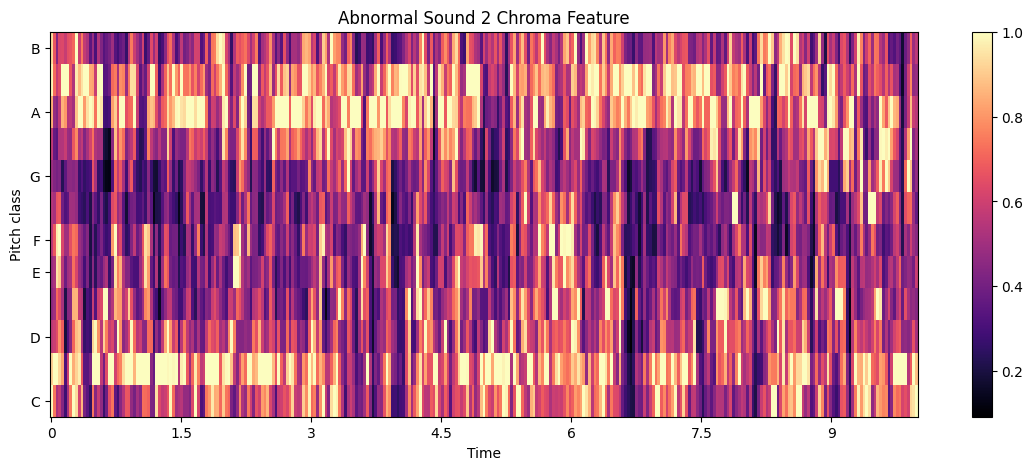

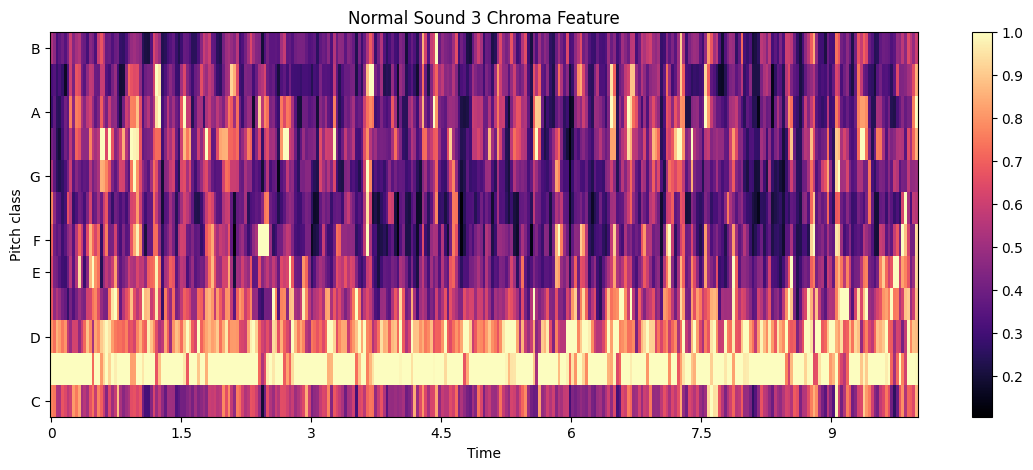

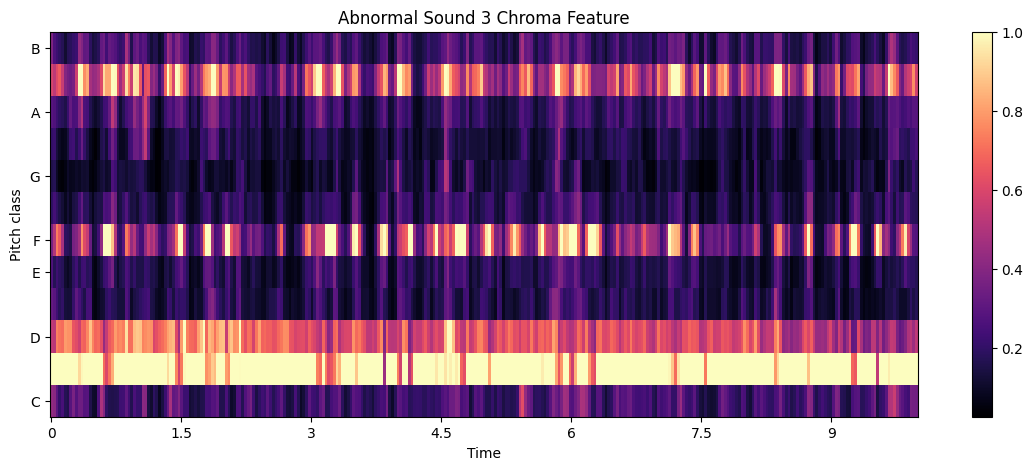

In [475]:

def plot_chroma(audio, sr, title='Chroma Feature'):
    chroma = librosa.feature.chroma_stft(y=audio, sr=sr)
    plt.figure(figsize=(14, 5))
    librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', sr=sr)
    plt.colorbar()
    plt.title(title)
    plt.show()

# chroma features for normal and abnormal sounds
for i in range(3):
    plot_chroma(data[i], sample_rates[i], title=f'Normal Sound {i+1} Chroma Feature')
    plot_chroma(data[i+3], sample_rates[i+3], title=f'Abnormal Sound {i+1} Chroma Feature')


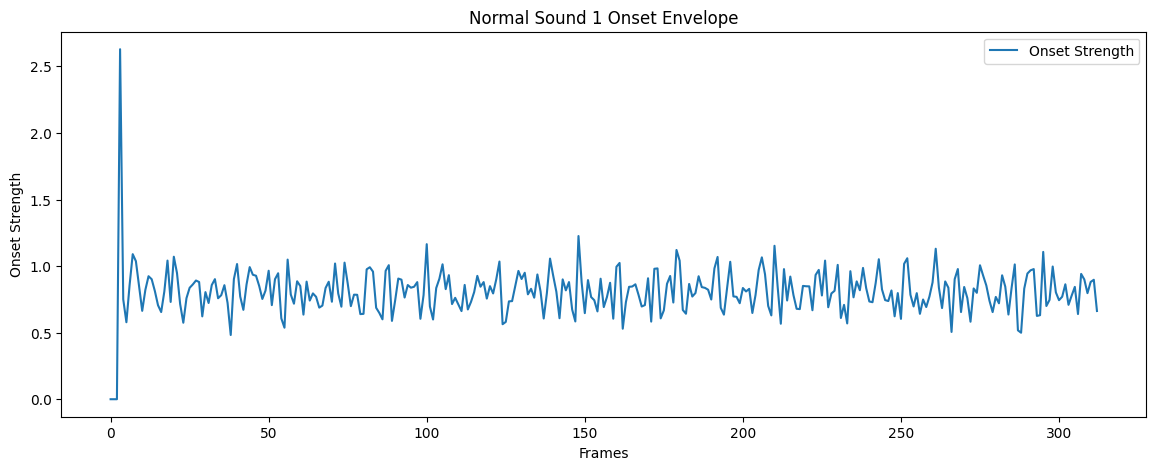

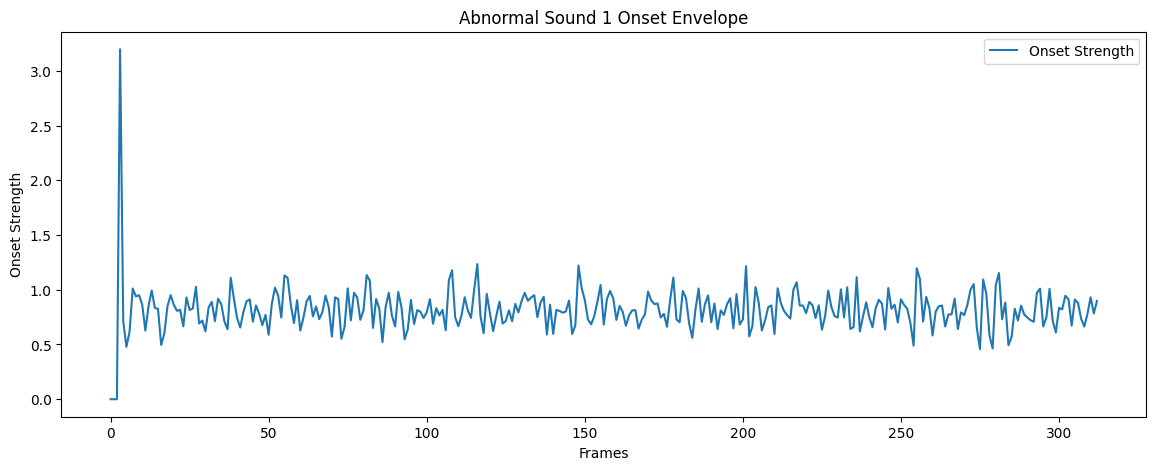

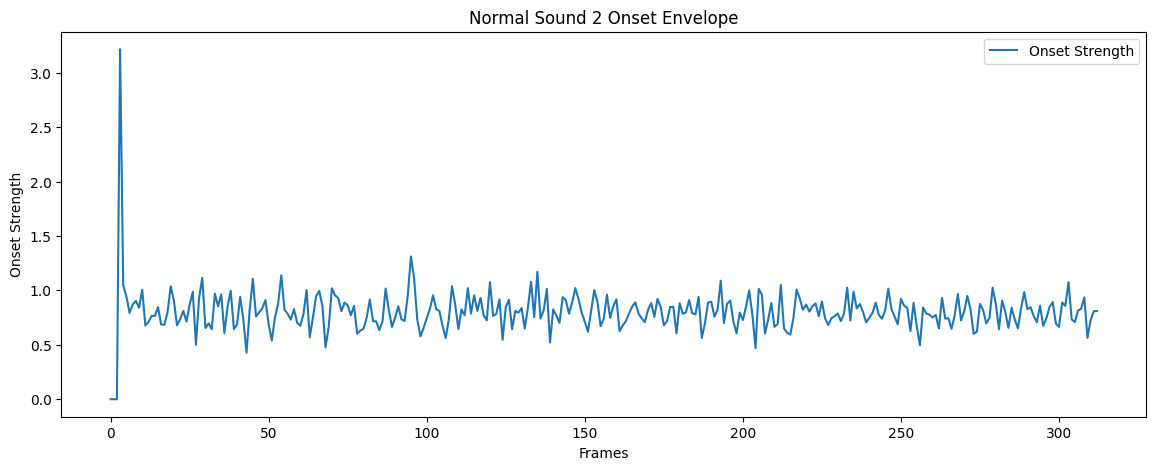

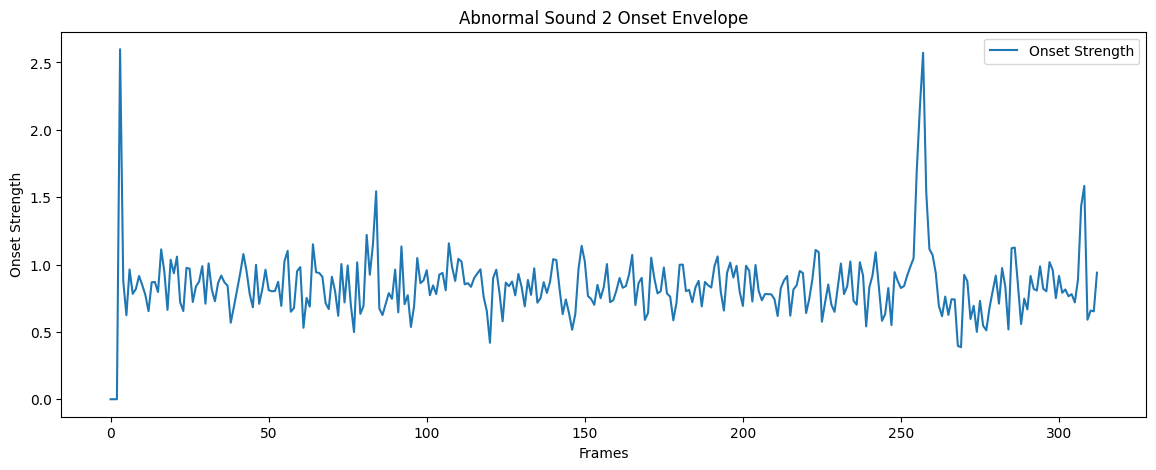

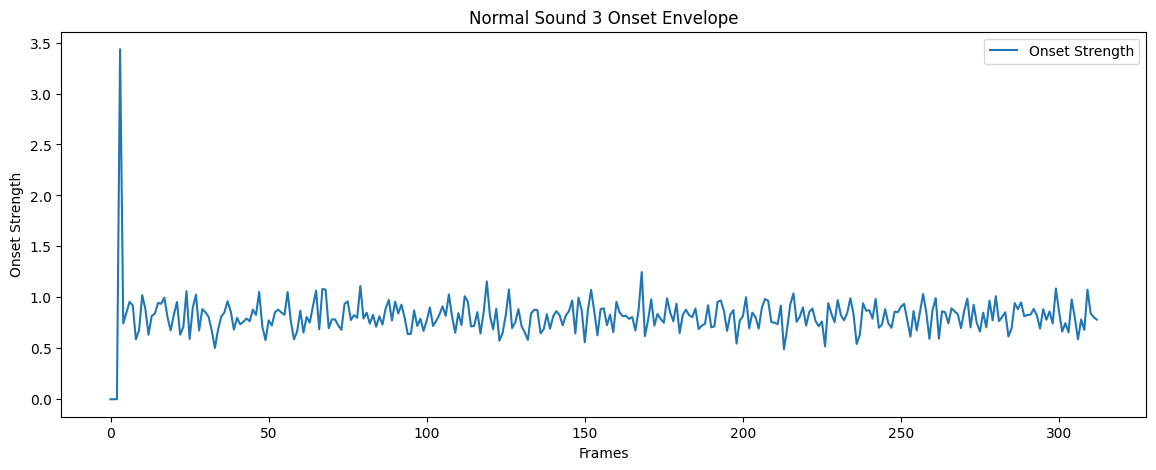

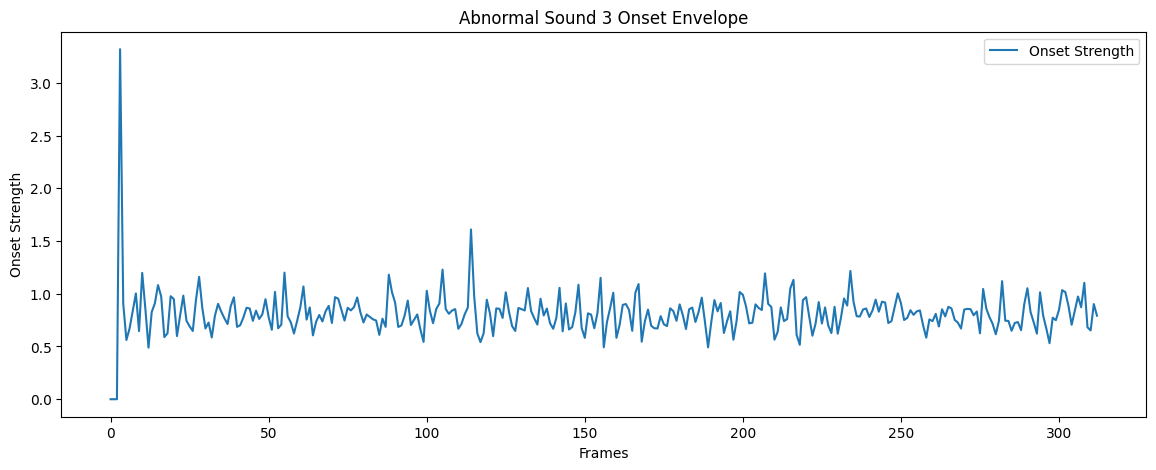

In [476]:

def plot_onset_envelope(audio, sr, title='Onset Envelope'):
    onset_env = librosa.onset.onset_strength(y=audio, sr=sr)
    plt.figure(figsize=(14, 5))
    plt.plot(onset_env, label='Onset Strength')
    plt.title(title)
    plt.xlabel('Frames')
    plt.ylabel('Onset Strength')
    plt.legend()
    plt.show()

# onset envelope for normal and abnormal sounds
for i in range(3):
    plot_onset_envelope(data[i], sample_rates[i], title=f'Normal Sound {i+1} Onset Envelope')
    plot_onset_envelope(data[i+3], sample_rates[i+3], title=f'Abnormal Sound {i+1} Onset Envelope')


In [477]:
from sklearn.preprocessing import LabelEncoder

# labelling (normal -> 0, abnormal -> 1)
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

print(labels_encoded)


[1 1 1 ... 0 0 0]


In [478]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels_encoded, test_size=0.2, random_state=42)

print(f'Training set size: {X_train.shape[0]}')
print(f'Test set size: {X_test.shape[0]}')


Training set size: 1134
Test set size: 284


In [479]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


model = RandomForestClassifier(n_estimators=100, random_state=42)


model.fit(X_train, y_train)


y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {accuracy}')
print(classification_report(y_test, y_pred))


Test accuracy: 0.8133802816901409
              precision    recall  f1-score   support

           0       0.83      0.42      0.56        80
           1       0.81      0.97      0.88       204

    accuracy                           0.81       284
   macro avg       0.82      0.70      0.72       284
weighted avg       0.82      0.81      0.79       284



In [480]:
from sklearn.linear_model import LogisticRegression


log_reg = LogisticRegression(max_iter=1000, random_state=42)


log_reg.fit(X_train, y_train)


y_pred_log_reg = log_reg.predict(X_test)


accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f'Logistic Regression Test accuracy: {accuracy_log_reg}')
print(classification_report(y_test, y_pred_log_reg))


Logistic Regression Test accuracy: 0.7852112676056338
              precision    recall  f1-score   support

           0       0.73      0.38      0.50        80
           1       0.79      0.95      0.86       204

    accuracy                           0.79       284
   macro avg       0.76      0.66      0.68       284
weighted avg       0.78      0.79      0.76       284



In [481]:
from sklearn.svm import SVC


svm_model = SVC(kernel='linear', random_state=42)


svm_model.fit(X_train, y_train)


y_pred_svm = svm_model.predict(X_test)


accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'SVM Test accuracy: {accuracy_svm}')
print(classification_report(y_test, y_pred_svm))


SVM Test accuracy: 0.7922535211267606
              precision    recall  f1-score   support

           0       0.82      0.34      0.48        80
           1       0.79      0.97      0.87       204

    accuracy                           0.79       284
   macro avg       0.80      0.65      0.67       284
weighted avg       0.80      0.79      0.76       284

